In [2]:
library(edgeR)

files <- c(
"ERR458584_trim.fastq.gzquant.counts",
"ERR458585_trim.fastq.gzquant.counts",
"ERR458586_trim.fastq.gzquant.counts",
"ERR458587_trim.fastq.gzquant.counts",
"ERR458588_trim.fastq.gzquant.counts",
"ERR458589_trim.fastq.gzquant.counts",
"ERR458590_trim.fastq.gzquant.counts",
"ERR458829_trim.fastq.gzquant.counts",
"ERR458830_trim.fastq.gzquant.counts",
"ERR458831_trim.fastq.gzquant.counts",
"ERR458832_trim.fastq.gzquant.counts",
"ERR458833_trim.fastq.gzquant.counts",
"ERR458834_trim.fastq.gzquant.counts",
"ERR458835_trim.fastq.gzquant.counts",
"ERR459011_trim.fastq.gzquant.counts",
"ERR459012_trim.fastq.gzquant.counts",
"ERR459013_trim.fastq.gzquant.counts",
"ERR459014_trim.fastq.gzquant.counts",
"ERR459015_trim.fastq.gzquant.counts",
"ERR459016_trim.fastq.gzquant.counts",
"ERR459017_trim.fastq.gzquant.counts",
"ERR459102_trim.fastq.gzquant.counts",
"ERR459103_trim.fastq.gzquant.counts",
"ERR459104_trim.fastq.gzquant.counts",
"ERR459105_trim.fastq.gzquant.counts",
"ERR459106_trim.fastq.gzquant.counts",
"ERR459107_trim.fastq.gzquant.counts",
"ERR459108_trim.fastq.gzquant.counts"
)

In [3]:
labels=c("SNF2_13.1", "SNF2_13.2", "SNF2_13.3", "SNF2_13.4", "SNF2_13.5", "SNF2_13.6", "SNF2_13.7", "SNF2_48.1", "SNF2_48.2", "SNF2_48.3", "SNF2_48.4", "SNF2_48.5", "SNF2_48.6", "SNF2_48.7", "WT_21.1", "WT_21.2", "WT_21.3", "WT_21.4", "WT_21.5", "WT_21.6", "WT_21.7", "WT_34.1", "WT_34.2", "WT_34.3", "WT_34.4", "WT_34.5", "WT_34.6", "WT_34.7")

In [4]:
data <- readDGE(files)

print(data)

An object of class "DGEList"
$samples
                                                           files group lib.size
ERR458584_trim.fastq.gzquant ERR458584_trim.fastq.gzquant.counts     1  1256923
ERR458585_trim.fastq.gzquant ERR458585_trim.fastq.gzquant.counts     1  1262523
ERR458586_trim.fastq.gzquant ERR458586_trim.fastq.gzquant.counts     1  1264066
ERR458587_trim.fastq.gzquant ERR458587_trim.fastq.gzquant.counts     1  1153933
ERR458588_trim.fastq.gzquant ERR458588_trim.fastq.gzquant.counts     1   994078
                             norm.factors
ERR458584_trim.fastq.gzquant            1
ERR458585_trim.fastq.gzquant            1
ERR458586_trim.fastq.gzquant            1
ERR458587_trim.fastq.gzquant            1
ERR458588_trim.fastq.gzquant            1
23 more rows ...

$counts
                       Samples
Tags                    ERR458584_trim.fastq.gzquant
  TRINITY_DN0_c0_g1_i1                            53
  TRINITY_DN0_c1_g1_i1                           130
  TRINITY_DN1_

In [5]:
group <- c(rep("SNF2", 14), rep("WT", 14))

dge = DGEList(counts=data, group=group)
dge <- estimateCommonDisp(dge)
dge <- estimateTagwiseDisp(dge)

Make an MDS plot

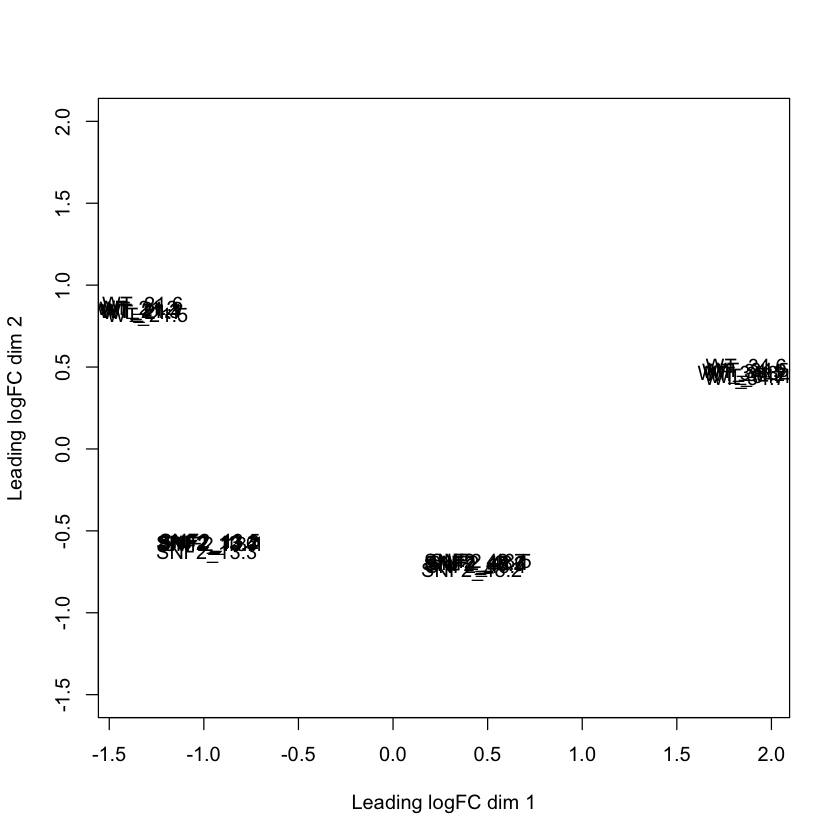

In [9]:
# pdf("yeast-edgeR-MDS.pdf")
plotMDS(dge, labels=labels, ylim=c(-1.5, 2))
# dev.off()

Perform differential expression analysis and output to csv file

In [7]:
et <- exactTest(dge, pair=c("WT", "SNF2"))
etp <- topTags(et, n=100000)

write.csv(etp$table, "yeast-edgeR.csv")

Make an MA-plot

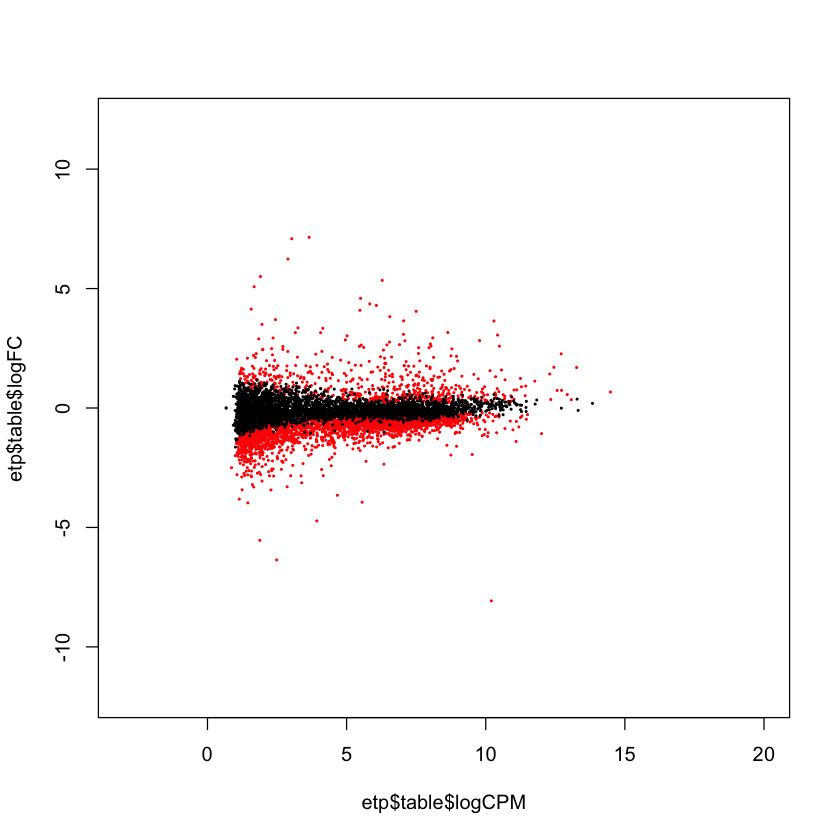

In [8]:
etp$table$logFC = -etp$table$logFC

# pdf("yeast-edgeR-MA-plot.pdf")
plot(
  etp$table$logCPM,
  etp$table$logFC,
  xlim=c(-3, 20), ylim=c(-12, 12), pch=20, cex=.3,
  col = ifelse( etp$table$FDR < .2, "red", "black" ) )
# dev.off()
